<a href="https://colab.research.google.com/github/karyateguh/Prediction-of-price-rice-in-DKI-Jakarta/blob/master/Prediction_of_Price_Rice_in_DKI_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Domain

As basic needs, rice having significant increment in few months. Economics from University of Gajahmada (UGM) in [this article](https://feb.ugm.ac.id/en/news/4510-rice-prices-exceed-het-highest-record-in-rice-history-in-indonesia), said, the price rice reached IDR 18.000 per kg in February 2024. And it becomes the country highest record in the history.

Those who will get the benefit from this work are:

1. The Government : This is serious economics problem. The goverment should take action regarding this phenomenon.
2. Rice supplier : To make a strategy whether add more stock or not.
3. The public : To set financial strategy.
4. Other business selling secondary needs : To help to adjust what they sell. Since people tend to spend their money on basic ones first.

To solve this problem, we will use time series. By its fuction to predict the future rice price, everything will be handled better.

# Business Understanding

Problem Statements:


1. Which models can predict the best
2. How is the price rice in the future



Goals



1. To find out which model can predict the best
2. To find out the price rice in the future


Solutions

1. Using Deep Learning algorithm
2. Using Statistical algorithm


# Data Understanding

The data belong to Badan Pangan Nasional (www.bpn.go.id). The price is based on DKI Jakarta region. And it is taken from traditional market.

The dataset consists of 1028 rows. It starts from 01-01-2022 to 10-24-2024.

Here the variables of the data have:

1. Beras Premium
2. Beras Medium
3. Kedelai Biji Kering (impor)
4. Bawang Merah
5. Bawang Putih Bonggol
6. Cabai Merah Keriting
7. Cabai Rawit Merah
8. Daging Sapi Murni
9. Daging Ayam Ras
10. Telur Ayam Ras
11. Gula Konsumsi
12. Minyak Goreng Kemasan Sederhana
13. Tepung Terigu (curah)
14. Minyak Goreng Kemasan Premium
15. Minyak Goreng Curah
16. Jagung TK Peternak
17. Ikan Kembung
18. Ikan Tongkol
19. Ikan Bandeng
20. Garam Halus Beryodium
21. Tepung Teriugu Kemasan (Non Curah)

This is the univariate data. All of the variables have no correlation one and another. This work focuses on analysing the price rice. We can delete all of unwanted columns. And keep Beras Premium and Beras Medium for reason.


Beras Premium has 37 missing data. So does Beras Medium. While, There is no duplicate columns in this dataset.



## Import Library

In [ ]:
!pip install ruptures

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import ruptures as rpt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loading

In [ ]:
url = 'https://github.com/karyateguh/Prediction-of-price-rice-in-DKI-Jakarta/raw/master/harga_eceran.csv'
df = pd.read_csv(url, dtype=str)
df.to_csv('harga_eceran.csv', index=False)

In [ ]:
df

,Komoditas (Rp),01/01/2022,02/01/2022,03/01/2022,04/01/2022,05/01/2022,06/01/2022,07/01/2022,08/01/2022,09/01/2022,...,15/10/2024,16/10/2024,17/10/2024,18/10/2024,19/10/2024,20/10/2024,21/10/2024,22/10/2024,23/10/2024,24/10/2024
0,Beras Premium,12.660,12.660,12.390,12.390,12.390,12.390,12.470,12.390,12.390,...,15.560,15.460,15.330,15.330,15.180,15.330,15.180,15.030,15.110,14.910
1,Beras Medium,11.270,11.010,11.010,11.010,11.010,11.010,11.010,11.010,11.010,...,13.680,13.210,13.380,13.380,13.210,13.380,13.210,13.120,13.210,13.220
2,Kedelai Biji Kering (Impor),12.000,12.240,11.700,12.240,12.240,12.240,12.240,12.240,12.240,...,9.600,9.600,9.600,9.600,9.600,9.600,9.600,9.600,9.600,9.600
3,Bawang Merah,35.510,31.850,34.880,35.260,35.260,33.490,30.910,33.130,33.130,...,32.810,32.770,33.110,33.320,32.390,32.390,32.250,31.110,32.670,32.770
4,Bawang Putih Bonggol,32.770,29.490,32.180,32.180,32.180,32.180,30.100,32.180,32.180,...,40.600,41.830,41.300,41.300,41.300,41.300,41.300,39.120,40.520,41.830
5,Cabai Merah Keriting,51.800,44.860,44.780,44.780,43.910,42.940,36.920,42.000,40.030,...,30.530,28.930,31.130,30.160,31.830,32.670,32.670,32.510,33.390,36.300
6,Cabai Rawit Merah,98.730,98.730,97.420,95.730,88.960,80.320,73.340,76.210,76.210,...,47.870,49.300,48.100,48.830,49.500,50.180,50.800,51.260,50.120,50.080
7,Daging Sapi Murni,126.580,130.000,124.900,127.940,125.900,125.900,125.900,125.900,125.900,...,135.910,137.430,136.580,138.280,136.580,135.760,136.580,136.580,136.580,134.910
8,Daging Ayam Ras,35.990,36.480,37.160,36.180,36.370,36.180,35.200,35.200,35.200,...,35.920,36.110,36.330,36.780,36.800,37.090,37.090,36.810,38.120,36.730
9,Telur Ayam Ras,32.200,30.980,30.860,30.690,29.880,29.560,27.520,28.960,28.450,...,27.760,28.330,27.790,27.500,27.500,27.650,27.500,26.820,27.500,27.930


## Data Cleaning

### Convert data to integer and transpose it

In [ ]:
def convert_to_int(df):
    df = df.astype(str).apply(lambda x: pd.to_numeric(x.str.replace('.', '', regex=False), errors='coerce')).astype('Int64')
    return df

In [ ]:
df_transposed = df.T
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:]
df_transposed = convert_to_int(df_transposed)

In [ ]:
df_transposed.to_csv('data_clean.csv', index=False)

### What are the variables of the data?

In [ ]:
df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 01/01/2022 to 24/10/2024
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Beras Premium                      991 non-null    Int64
 1   Beras Medium                       991 non-null    Int64
 2   Kedelai Biji Kering (Impor)        988 non-null    Int64
 3   Bawang Merah                       991 non-null    Int64
 4   Bawang Putih Bonggol               991 non-null    Int64
 5   Cabai Merah Keriting               991 non-null    Int64
 6   Cabai Rawit Merah                  991 non-null    Int64
 7   Daging Sapi Murni                  991 non-null    Int64
 8   Daging Ayam Ras                    991 non-null    Int64
 9   Telur Ayam Ras                     991 non-null    Int64
 10  Gula Konsumsi                      991 non-null    Int64
 11  Minyak Goreng Kemasan Sederhana    991 non-null    Int64
 12  Tepung Ter

### Drop unnecessary columns

In [ ]:
columns_to_drop = [
    'Kedelai Biji Kering (Impor)', 'Bawang Merah', 'Bawang Putih Bonggol',
    'Cabai Merah Keriting', 'Cabai Rawit Merah', 'Daging Sapi Murni',
    'Daging Ayam Ras', 'Telur Ayam Ras', 'Gula Konsumsi',
    'Minyak Goreng Kemasan Sederhana', 'Tepung Terigu (Curah)',
    'Minyak Goreng Curah', 'Jagung Tk Peternak', 'Ikan Kembung',
    'Ikan Tongkol', 'Ikan Bandeng', 'Garam Halus Beryodium',
    'Tepung Terigu Kemasan (non-curah)', 'Minyak Goreng Kemasan Premium'
]
df_transposed.drop(columns=columns_to_drop, inplace=True)

### Finding the missing data

In [ ]:
df_transposed.isnull().sum()

,0
Komoditas (Rp),
Beras Premium,37
Beras Medium,37


### Interpolate the missing data

In [ ]:
df_transposed = df_transposed.interpolate(method='linear')

Using linear interpolation for time series data can be a smart choice, especially if simplicity and speed are priorities. Here’s a quick breakdown of why linear interpolation might work well and what to keep in mind:

Linear Interpolation Basics
Linear interpolation connects two data points with a straight line.

Pros: It’s fast and straightforward, making it especially useful if the data isn’t highly variable or if we only need a basic approximation between points.

Cons: Linear interpolation doesn't account for more complex trends between data points. In cases where data fluctuates or follows a non-linear trend, this method can result in sudden changes or less smooth transitions.

Why Linear?
Linear interpolation can work well for data that doesn’t show a lot of variation between points. Since it doesn’t need as much computation as spline interpolation, it’s a good fit if you need quick results and a simple approach. While it might not fully capture all the nuances in time series data, linear interpolation provides a clean, direct estimate between points and is often enough to keep things on track without overcomplicating the process.

### Rename column and adjust date

In [ ]:
df_final = df_transposed.reset_index().rename(columns={'index': 'date', 'Beras Premium': 'beras_premium', 'Beras Medium': 'beras_medium'})
df_final['date'] = pd.to_datetime(df_final['date'], format='%d/%m/%Y')


df_final.to_csv('data_final.csv', index=False)

## Explanatory Data Analysis [EDA]

### The Diagram Price Rice from 2022 to 2024

In [ ]:
dates = df_final['date'].values
premium = df_final['beras_premium'].values
medium = df_final['beras_medium'].values

### 1. Plot Line

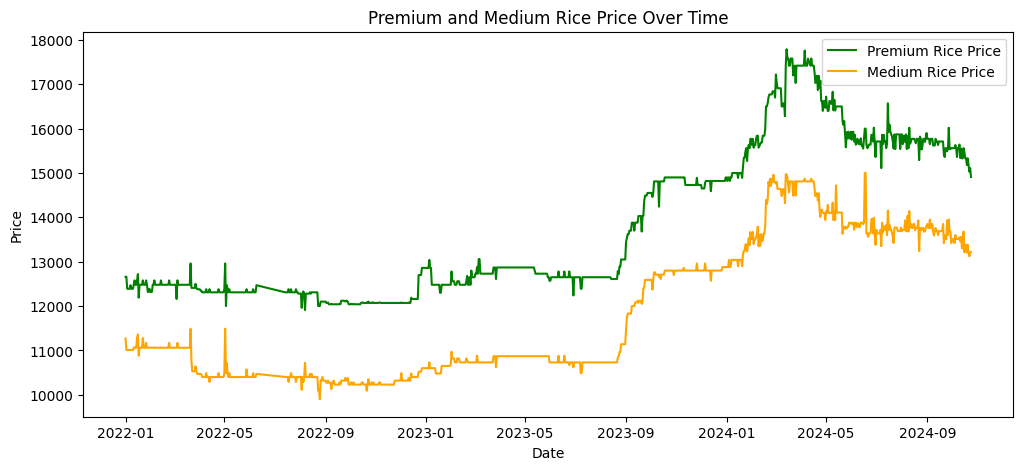

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(dates, premium, label="Premium Rice Price", color='green')
plt.plot(dates, medium, label="Medium Rice Price", color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Premium and Medium Rice Price Over Time')
plt.legend()
plt.show()

There is almost no difference about beras_premium and beras_medium plot. They differ in price.

### 2. Histogram and KDE Plot

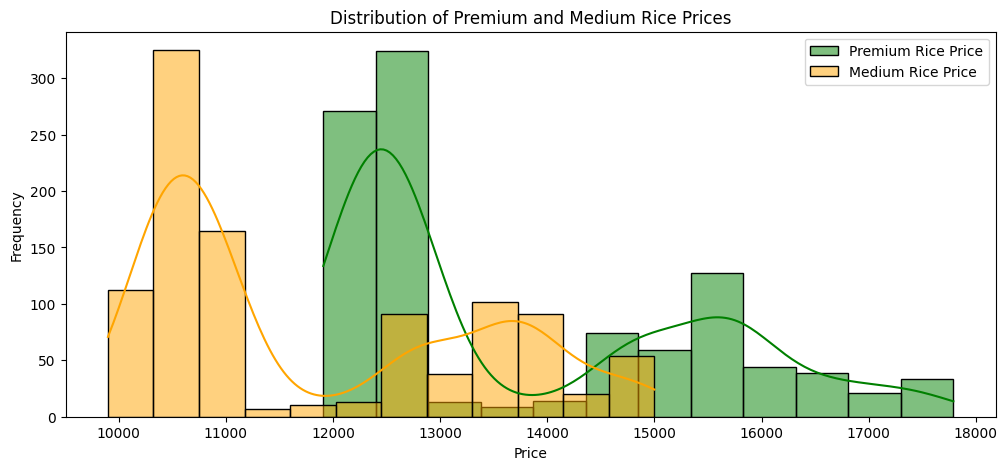

In [ ]:
# 2. Histogram and KDE Plot
plt.figure(figsize=(12, 5))
sns.histplot(premium, kde=True, color='green', label="Premium Rice Price")
sns.histplot(medium, kde=True, color='orange', label="Medium Rice Price")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Premium and Medium Rice Prices')
plt.legend()
plt.show()

Thing that we can note from above is, beras_premium and beras_medium have simillar plot. To optimize the model, from now on, we only use beras_premium to be analyzed and trained.

### 3. Box Plot for Outliers

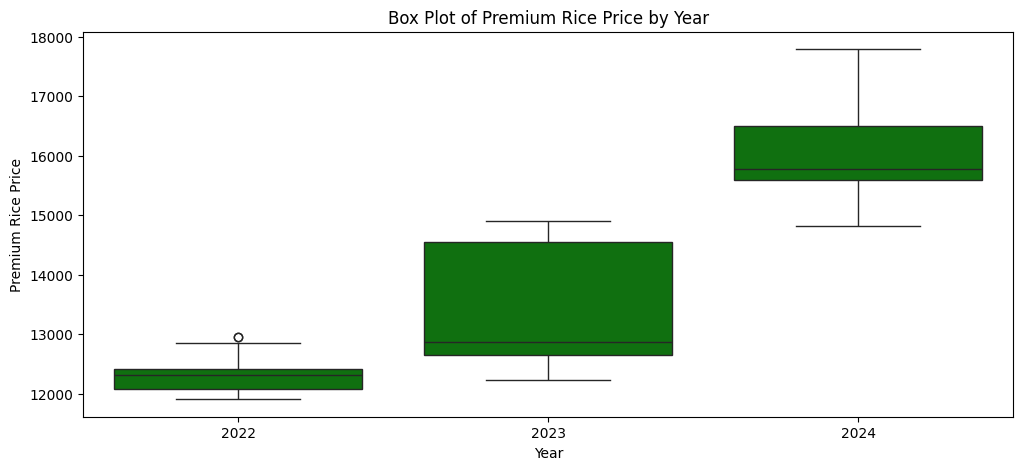

In [ ]:
dates = pd.to_datetime(dates)
# df_final['year'] = dates.year  # No need to assign to df_final if you intend to use df for the plot
df_final['year'] = dates.year  # Assign the 'year' column to the DataFrame 'df'

#plt.figure(figsize=(12, 5))
#sns.boxplot(x='year', y='beras_premium', data=df_final, color='green')
#dates = pd.to_datetime(dates)
# df_final['year'] = dates.year  # No need to assign to df_final if you intend to use df for the plot
#df_final['year'] = dates.year  # Assign the 'year' column to the DataFrame 'df'

plt.figure(figsize=(12, 5))
sns.boxplot(x='year', y='beras_premium', data=df_final, color='green')  # Now df contains the 'year' column
plt.xlabel('Year')
plt.ylabel('Premium Rice Price')
plt.title('Box Plot of Premium Rice Price by Year')
plt.show()

### 4. Decompose Time Series

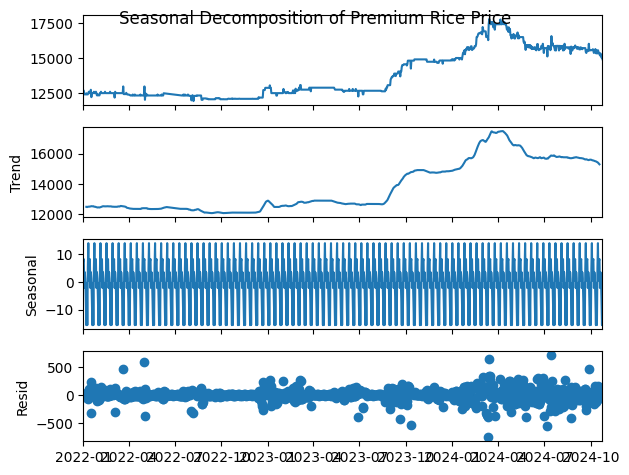

In [ ]:
premium_series = pd.Series(premium, index=dates)
decomposition = seasonal_decompose(premium_series, model='additive', period=12)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Premium Rice Price')
plt.show()

### 5. ACF and PACF Plots

<Figure size 1200x500 with 0 Axes>

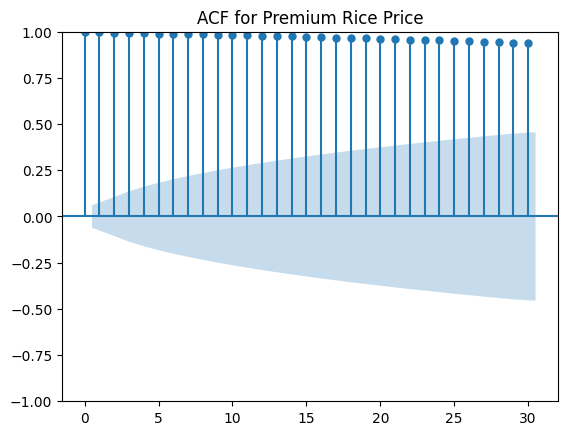

<Figure size 1200x500 with 0 Axes>

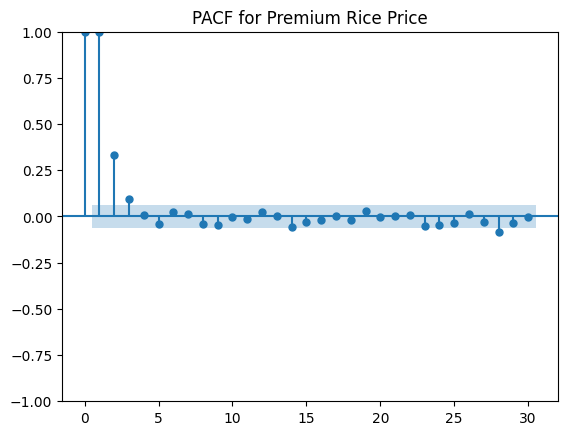

In [ ]:
plt.figure(figsize=(12, 5))
plot_acf(premium, lags=30)
plt.title('ACF for Premium Rice Price')
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(premium, lags=30)
plt.title('PACF for Premium Rice Price')
plt.show()

### 6. Moving Average and Rolling Statistics

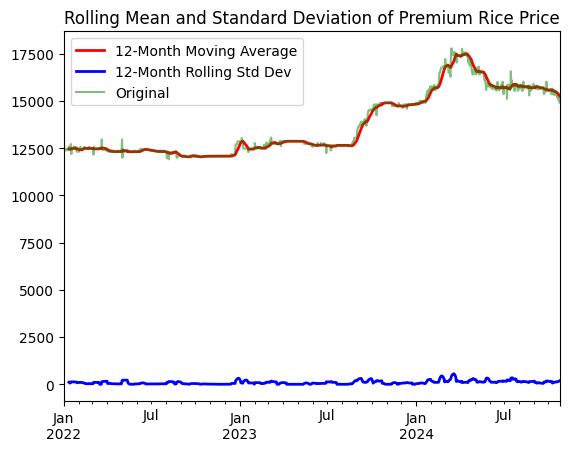

In [ ]:
premium_series.rolling(window=12).mean().plot(label='12-Month Moving Average', color='red', linewidth=2)
premium_series.rolling(window=12).std().plot(label='12-Month Rolling Std Dev', color='blue', linewidth=2)
premium_series.plot(label='Original', color='green', alpha=0.5)
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Premium Rice Price')
plt.show()


### 7. Stationarity Test (ADF Test)

In [ ]:
adf_test = adfuller(premium)
print(f"ADF Test Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
for key, value in adf_test[4].items():
    print(f'Critical Value {key}: {value}')

ADF Test Statistic: -0.7297178103124446
p-value: 0.838901075779131
Critical Value 1%: -3.436752117511071
Critical Value 5%: -2.864366633740962
Critical Value 10%: -2.5682750226211546


### 8. Seasonal Plot or Heatmap for Seasonality

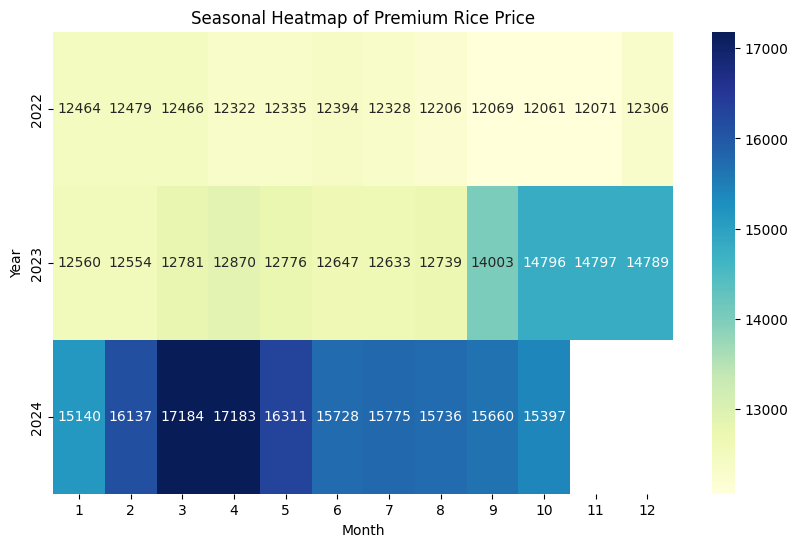

In [ ]:
df_final['month'] = dates.month
# Convert 'beras_premium' to numeric, coercing errors to NaN
df_final['beras_premium'] = pd.to_numeric(df_final['beras_premium'], errors='coerce')

# Recalculate the pivot table with numeric data
pivot_table = df_final.pivot_table(values='beras_premium', index='year', columns='month', aggfunc='mean')

# Replace NaN with 0 before plotting the heatmap
# pivot_table = pivot_table.fillna(0)  # Replace NaT and NaN with 0
# The above line is changed to use .astype(float) instead of .fillna(0)
# This ensures all data in the pivot_table is of numeric type, resolving the TypeError
pivot_table = pivot_table.astype(float)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Seasonal Heatmap of Premium Rice Price')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

### 9. Lag Plot

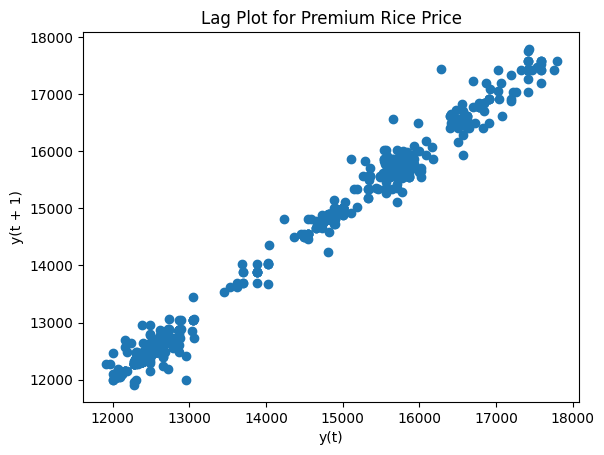

In [ ]:
pd.plotting.lag_plot(pd.Series(premium), lag=1)
plt.title('Lag Plot for Premium Rice Price')
plt.show()


### 10. Change Point Detection

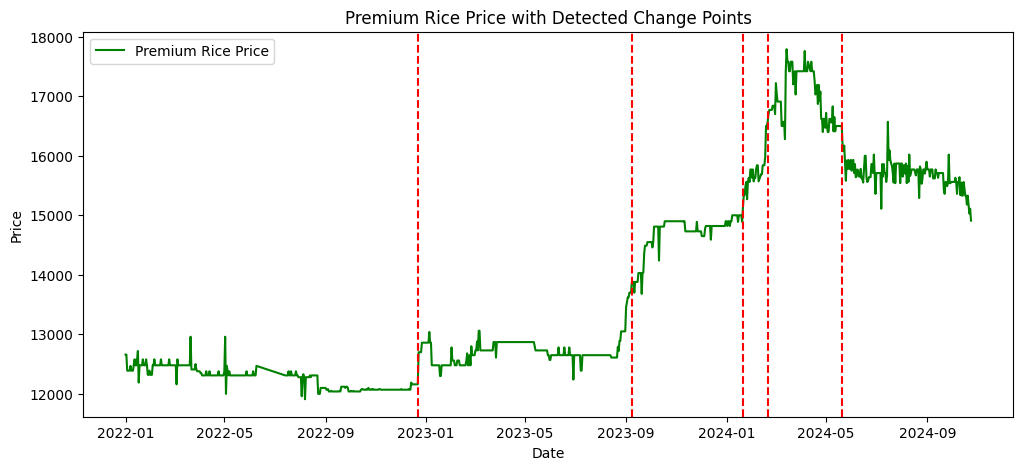

In [ ]:
# Using ruptures to find change points
algo = rpt.Pelt(model="rbf").fit(premium)
breakpoints = algo.predict(pen=10)
plt.figure(figsize=(12, 5))
plt.plot(dates, premium, color='green', label="Premium Rice Price")
for bp in breakpoints:
    # Check if the breakpoint is within the valid range of indices for 'dates'
    if bp < len(dates):
        plt.axvline(dates[bp], color='red', linestyle="--")
plt.title('Premium Rice Price with Detected Change Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Data Preparation

## Normalization

Imagine you have a set of scores from a game, ranging from 0 to 100. Normalization changes these scores to fit within a range, usually 0 to 1. So if you have a score of 50, it might become 0.5 after normalization.
This is done by taking each score, subtracting the lowest score, and then dividing by the difference between the highest and lowest scores.


Why Use Normalization?

It helps when the data has different scales. For example, if you have one score that goes from 0 to 100 and another that goes from 0 to 1000, normalization makes them comparable.
It's especially useful for models like LSTMs (Long Short-Term Memory networks) because they are sensitive to the scale of input data. Normalizing helps them learn better.

In [ ]:
df_final.set_index('date', inplace=True)
data = df_final[['beras_premium']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

## Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Model 1 : Model Sequential using LSTM

## Modelling

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## Trainning

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0323 - val_loss: 0.0229 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0035 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0023 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020 - val_loss: 0.0104 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0024 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0018 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0017 - val_loss: 0.0138 - learning_rate: 0.0010
Epoch 10/1

## Predicting

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


## Visualizing and Evaluating

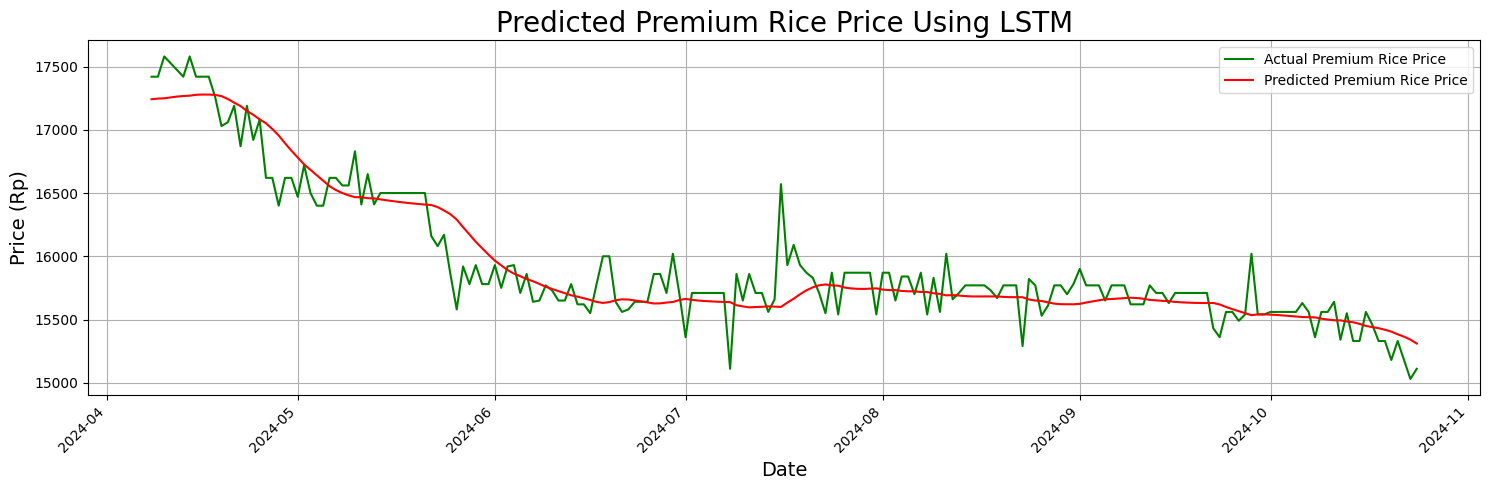

Train Mean Absolute Error (MAE): 118.75 Rp
Test Mean Absolute Error (MAE): 143.83 Rp
Train Root Mean Squared Error (RMSE): 204.34 Rp
Test Root Mean Squared Error (RMSE): 195.34 Rp


In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df_final.index[-len(y_test):], y_test_actual, color='g', label='Actual Premium Rice Price')
plt.plot(df_final.index[-len(y_test):], test_predict, color='r', label='Predicted Premium Rice Price') # Changed predicted_prices to test_predict
plt.title('Predicted Premium Rice Price Using LSTM', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (Rp)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

mae_train = mean_absolute_error(y_train_actual, train_predict)
rmse_train = np.sqrt(mean_squared_error(y_train_actual, train_predict))
mae_test = mean_absolute_error(y_test_actual, test_predict)
rmse_test = np.sqrt(mean_squared_error(y_test_actual, test_predict))


print(f'Train Mean Absolute Error (MAE): {mae_train:.2f} Rp')
print(f'Test Mean Absolute Error (MAE): {mae_test:.2f} Rp')
print(f'Train Root Mean Squared Error (RMSE): {rmse_train:.2f} Rp')
print(f'Test Root Mean Squared Error (RMSE): {rmse_test:.2f} Rp')

**Mean Squared Error (MSE)**
MSE is a way to measure how far off your predictions are from the actual results. You take the difference between each predicted value and the actual value, square those differences (to make sure they're all positive), and then average them.
Squaring the differences helps to give more weight to larger errors, so MSE is sensitive to big mistakes. If you make a big error, MSE will show that clearly.




**Root Mean Squared Error (RMSE)**
RMSE is just the square root of MSE. It takes the average of the squared differences (like MSE) but then brings it back to the same units as your original data by taking the square root.
RMSE is often easier to understand because it’s in the same scale as the data. So if you’re predicting something like temperature in degrees, RMSE will also be in degrees, making it more intuitive.

**When to Use MSE and RMSE**
Use MSE when you want to focus on larger errors and you don’t mind the values being in squared units. It’s good for comparing different models because it penalizes larger mistakes more.
Use RMSE when you want a measure that’s easy to interpret and in the same units as your data. It’s helpful for giving a clear idea of how far off your predictions are, on average.

# Model 2 Using Bidirectional LSTM

## Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense

model2 = Sequential()
model2.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(time_step, 1)))
model2.add(Dropout(0.2))
model2.add(Bidirectional(LSTM(100, return_sequences=False)))
model2.add(Dropout(0.2))
model2.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, 30, 200)             │          81,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 200)                 │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,601 (1.23 MB)

 Trainable params: 322,601 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

## Trainning

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


initial_learning_rate = 0.001
def lr_schedule(epoch, lr):
    if epoch > 20:
        return lr * 0.1
    return lr

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
lr_scheduler = LearningRateScheduler(lr_schedule)


model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate), loss='mean_squared_error')


history = model2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint, lr_scheduler],
    verbose=1
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0299 - val_loss: 0.0123 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0023 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - val_loss: 0.0081 - learning_rate: 0.0010
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_loss: 0.0098 - learning_rate: 0.0010
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0012 - val_loss: 0.0166 - learning_rate: 0.0010
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 10/50
25/25 ━

## Predicting

In [ ]:
train_predict = model2.predict(X_train)
test_predict = model2.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


## Visualizing and Evaluating

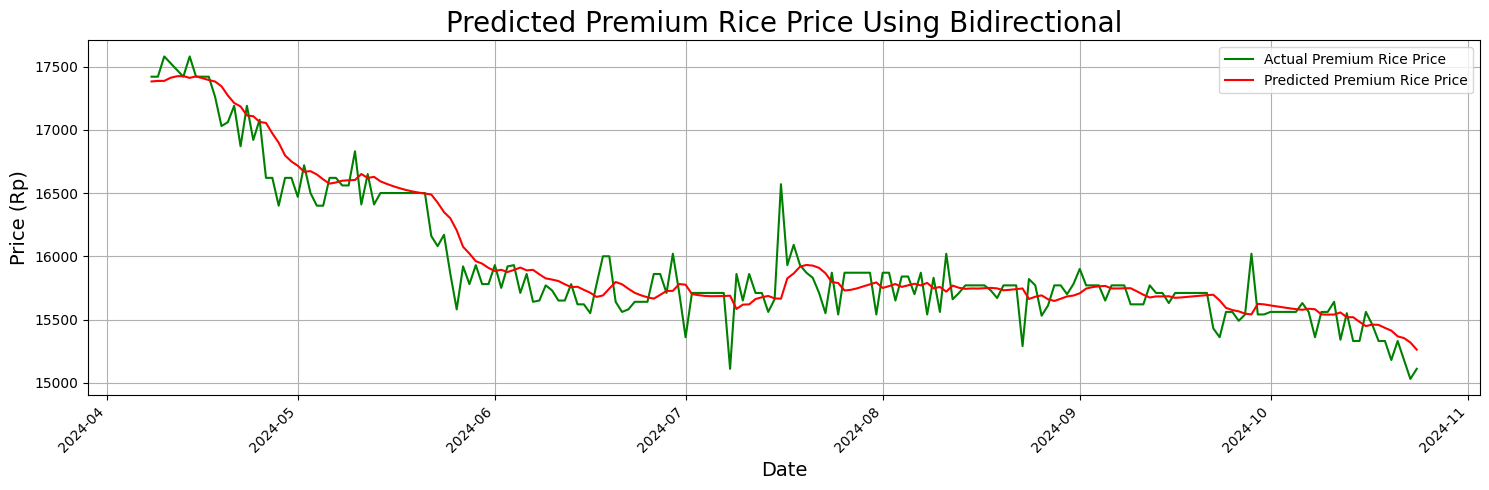

Train Mean Absolute Error (MAE): 89.18 Rp
Test Mean Absolute Error (MAE): 126.19 Rp
Train Root Mean Squared Error (RMSE): 143.73 Rp
Test Root Mean Squared Error (RMSE): 180.01 Rp


In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df_final.index[-len(y_test):], y_test_actual, color='g', label='Actual Premium Rice Price')
plt.plot(df_final.index[-len(y_test):], test_predict, color='r', label='Predicted Premium Rice Price')
plt.title('Predicted Premium Rice Price Using Bidirectional', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (Rp)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


mae_train = mean_absolute_error(y_train_actual, train_predict)
rmse_train = np.sqrt(mean_squared_error(y_train_actual, train_predict))
mae_test = mean_absolute_error(y_test_actual, test_predict)
rmse_test = np.sqrt(mean_squared_error(y_test_actual, test_predict))


print(f'Train Mean Absolute Error (MAE): {mae_train:.2f} Rp')
print(f'Test Mean Absolute Error (MAE): {mae_test:.2f} Rp')
print(f'Train Root Mean Squared Error (RMSE): {rmse_train:.2f} Rp')
print(f'Test Root Mean Squared Error (RMSE): {rmse_test:.2f} Rp')

# Model 3 Using ARIMA

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
import statsmodels.api as sm

## Differencing data

In [ ]:
data = pd.read_csv('data_final.csv', index_col='date', parse_dates=True)


## Find the best combination of p,d,q



In [ ]:
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_order = None
best_model = None

## ARIMA model 1,1,2

In [ ]:
for param in pdq:
    try:
        model = sm.tsa.ARIMA(data['beras_premium'], order=param)
        results = model.fit()
        print(f'ARIMA{param} - AIC: {results.aic}')

        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
            best_model = results
    except Exception as e:
        continue

print(f'Best ARIMA Model: ARIMA{best_order} - AIC: {best_aic}')
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) - AIC: 18185.372015358007


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) - AIC: 16920.23172050831


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) - AIC: 16002.533088124246
ARIMA(0, 1, 0) - AIC: 13043.589645147285
ARIMA(0, 1, 1) - AIC: 12848.001442943998
ARIMA(0, 1, 2) - AIC: 12848.759788555722


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(1, 0, 0) - AIC: 13062.940695190766
ARIMA(1, 0, 1) - AIC: 12869.60074187129


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(1, 0, 2) - AIC: 12870.10574693669
ARIMA(1, 1, 0) - AIC: 12874.943219231356
ARIMA(1, 1, 1) - AIC: 12848.818038605677


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(1, 1, 2) - AIC: 12843.188255896812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) - AIC: 12894.836693315816
ARIMA(2, 0, 1) - AIC: 12870.206432110386


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(2, 0, 2) - AIC: 12872.131109400712
ARIMA(2, 1, 0) - AIC: 12851.86003904359


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(2, 1, 1) - AIC: 12850.65082313233
ARIMA(2, 1, 2) - AIC: 12852.81808741725
Best ARIMA Model: ARIMA(1, 1, 2) - AIC: 12843.188255896812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          beras_premium   No. Observations:                 1028
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -6417.594
Date:                Thu, 14 Nov 2024   AIC                          12843.188
Time:                        16:13:10   BIC                          12862.926
Sample:                    01-01-2022   HQIC                         12850.680
                         - 10-24-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9738      0.015     65.460      0.000       0.945       1.003
ma.L1         -1.4407      0.020    -70.530      0.000      -1.481      -1.401
ma.L2          0.4667      0.014     32.767      0.0

## Forecasting

In [ ]:
pred_start_date = '2023-01-01'
pred_end_date = '2024-12-31'

pred = best_model.predict(start=pred_start_date, end=pred_end_date, typ='levels')

## Visualisation and Evaluation

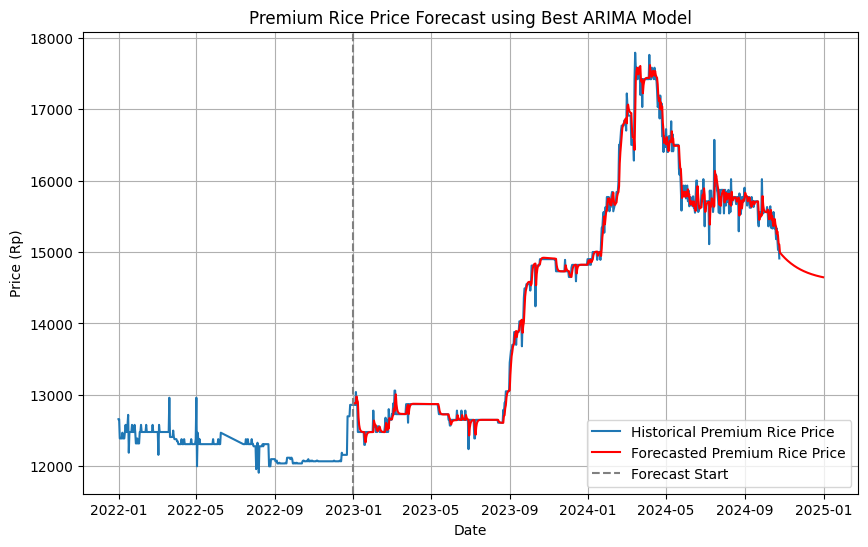

Mean Squared Error (MSE): 19849.36
Root Mean Squared Error (RMSE): 140.89


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['beras_premium'], label='Historical Premium Rice Price')
plt.plot(pred, color='red', label='Forecasted Premium Rice Price')


pred_start_date = pd.to_datetime(pred_start_date)

plt.axvline(x=pred_start_date, color='gray', linestyle='--', label='Forecast Start')
plt.title('Premium Rice Price Forecast using Best ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


pred_start_date = pd.to_datetime(pred_start_date)

min_len = min(len(data['beras_premium'][pred_start_date:pred_end_date]), len(pred))
actual_data = data['beras_premium'][pred_start_date:pred_end_date][:min_len]
pred = pred[:min_len]


mse = mean_squared_error(actual_data, pred)
rmse = np.sqrt(mse)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Save the best model

In [ ]:
from keras.saving import save_model
save_model(model2, "my_model.keras")
